# EE16A Homework 12

## Question 1: Labeling Patients Using Gene Expression Data

In [21]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


### Part (b)

In [22]:
A = np.load('gene_data_train.npy')
b = np.load('diabetes_train.npy')

# YOUR CODE HERE
partb = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
print(partb)

[[-0.15646169]
 [ 0.09239418]
 [ 0.48053974]
 [-0.5847018 ]
 [-0.35350734]]


### Part (c)

In [23]:
A_test = np.load('gene_data_test.npy')
b_test = np.load('diabetes_test.npy')

partc = np.sign(np.dot(A_test, partb))
print(partc)
if all(partc == b_test):
    print("GOOD")

[[ 1.]
 [-1.]
 [-1.]
 [ 1.]]
GOOD


## Question 2: The Framingham Risk Score

In [24]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Part (a)

In [32]:
# Importing medical data
import scipy.io

# LOADS IN THE MEDICAL DATA IN THE FORM OF A PYTHON DICTIONARY.
# Data credit: CDC (https://www.cdc.gov/nchs/nhanes/index.htm)
data = scipy.io.loadmat('CVDdata.mat')

#UNPACKING DATA INTO COLUMN VECTORS
AGE = data['AGE']
TC = data['TC']
HDL = data['HDL']
SBP = data['SBP']
DIA = data['DIABETIC']
SMK = data['SMOKER']
p = data['pNoisy']

# Write expressions for b, A1, A2, A3, A4, A5, A6
# It will help to use the identity log_n(z) = log(z)/log(n)

b = np.log(np.log(1 - p)/np.log(0.95)) + 26.1931

A1 = np.log(AGE)
A2 = np.log(TC)
A3 = np.log(HDL)
A4 = np.log(SBP)
A5 = DIA
A6 = SMK 

### Part (b)

In [33]:
# Write expressions for b and A
# The function np.hstack will be helpful for constructing A
b = np.array(b.ravel())
A = np.hstack((A1,A2,A3,A4,A5,A6))

### Part (c)

In [34]:
# Write an expression for xhat

xhat = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))

print("The estimated values for x are xhat = " + str(xhat.T))

The estimated values for x are xhat = [ 2.34327369  1.24044555 -0.66934665  2.68555428  0.70524013  0.51329258]


### Part (d)

In [35]:
# the model estimate bhat, and the squared error e2
bhat = np.dot(A, xhat)
e2 = np.linalg.norm(bhat - b)**2 

print("The model's prediction of b is " + str(bhat))
print("The sum of squared errors is " + str(e2))

The model's prediction of b is [ 26.21399319  27.4128133   27.43648772  25.80673192  26.12639507
  26.68161922  27.16927526  27.14921488  25.65767063  27.06523114
  25.81175786  26.6032258   26.68011423  26.84918426  26.29966592
  26.85483259  26.14358214  25.38011292  28.80400373  24.92787361
  26.77530659  27.46602092  26.69735177  26.7798927   26.21647793
  26.25267347  27.23121901  26.94595637  25.75369621  27.46792417
  26.58987675  27.37796315  26.75467019  25.65642702  26.00654597
  25.06980951  24.97513153  26.13889026  26.40111589  26.85670399
  26.21457917  27.05878566  28.91126017  28.53106591  27.42836368
  26.84421906  25.45854365  26.27208395  26.51473879  24.98249006
  26.52040572  25.69758668  27.51931497  28.24008412  27.03477044
  27.28423925  26.91858308  25.11215988  25.29448753  27.21335466
  26.32177296  23.7466842   25.5854037   25.74490149  26.07656195
  25.16067214  27.91608902  23.9026621   27.57020497  26.92704953
  27.09646864  27.47683759  28.29195644  26.2

### Part (e)

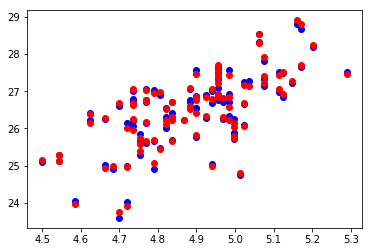

In [36]:
# Linear plots, pick an index below (0,1,2,etc). This code will plot b and bhat vs Ai
i = 3
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],bhat,'or')

### Part (f)

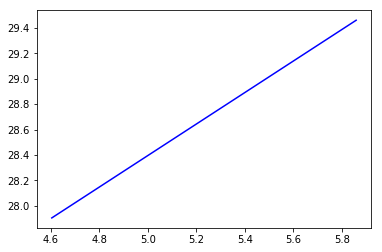

In [37]:
# Here are the values for the test plot
age_test = 40
tc_test_vector = np.linspace(100,350,(350-100+1))
hdl_test = 25
sbp_test = 220
dia_test = 1
smk_test = 1

A2_test = np.zeros(tc_test_vector.size)
b_test = np.zeros(tc_test_vector.size)

for ind in range(tc_test_vector.size):
    tc_test = tc_test_vector[ind];
    # Use the values for age_test, tc_test, hdl_test, sbp_test, dia_test
    # and smk_test to calculate the next value for b_test (y axis value)
    # and A2_test (x_axis value)
    a = np.array([np.log(age_test), np.log(tc_test), np.log(hdl_test), np.log(sbp_test), dia_test, smk_test])
    b_test[ind] = np.dot(a, xhat)
    A2_test[ind] = np.log(tc_test)

plt.plot(A2_test,b_test,'-b')

### Part (g)

The sum of squared errors after perturbing is 8.79782099271


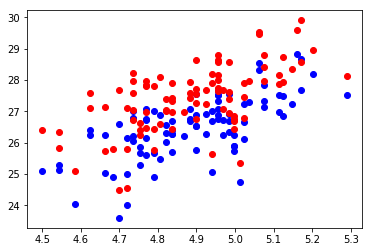

In [45]:
# Perturb xhat from the solution above, store into x_perturbed and replot.

# Use the following example expression with different pertrubations.
x_perturbed = xhat+np.array([.1, 0.2, 0.2, -0.3, 0.1, 0.32]).T

# What are the new estimated b values in terms of x_perturbed?
b_perturbed = np.dot(A,x_perturbed)

# Plot again
plt.plot(A[:,i],b,'ob')
plt.plot(A[:,i],b_perturbed,'or')

# What is the new sum of squared errors (after perturbing)?
e2_perturbed = (np.linalg.norm(b_perturbed - b))

print("The sum of squared errors after perturbing is " + str(e2_perturbed))

### PRACTICE: Part (h)

In [ ]:
# Nonlinear plots, pick an index below (0,1,2,etc). This code will plot b and bhat vs Ai
i = 3

# Write an expression for estimated p values here
p_estimated = 1- np.exp(np.log(0.95)*np.exp(bhat - 26.1931))

plt.plot(np.exp(A[:,i]),p,'ob')
plt.plot(np.exp(A[:,i]),p_estimated,'or')

### PRACTICE: Part (i)

In [ ]:
# transform b_test into p_test
_test = 1- np.exp(np.log(0.95)*np.exp(b_test - 26.1931))

plt.plot(tc_test_vector,p_test,'-b')